In [1]:
import pytraj as pt
import MDAnalysis as mda
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



Bad key text.latex.preview in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/usr/ulocal/anaconda3/envs/mdthings/lib/python3.8/site-

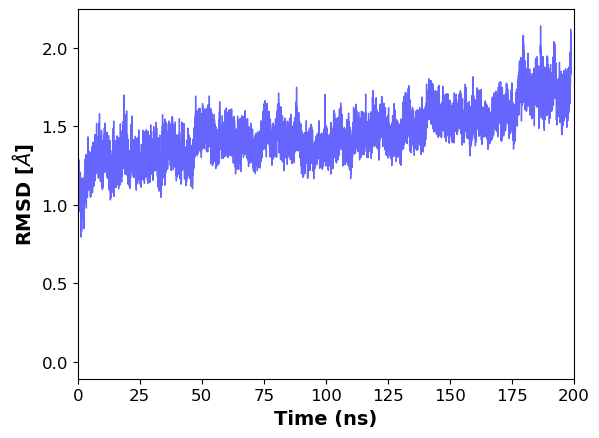

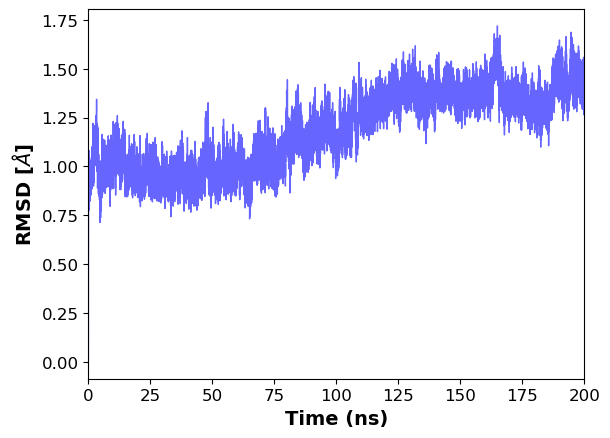

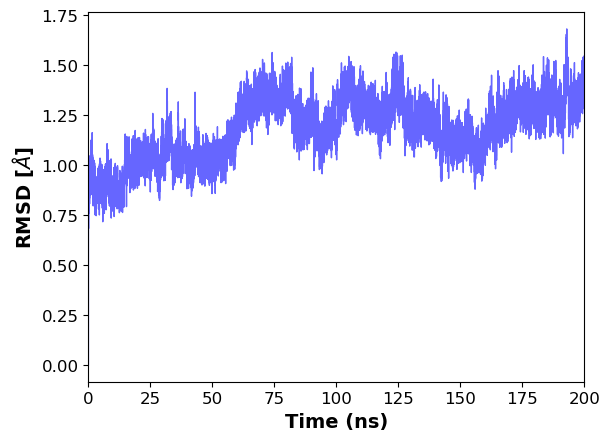

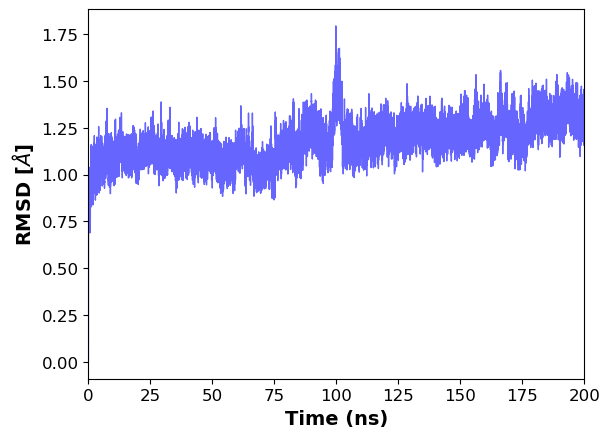

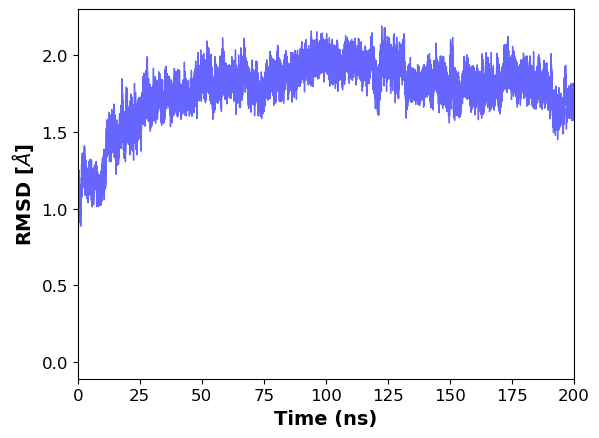

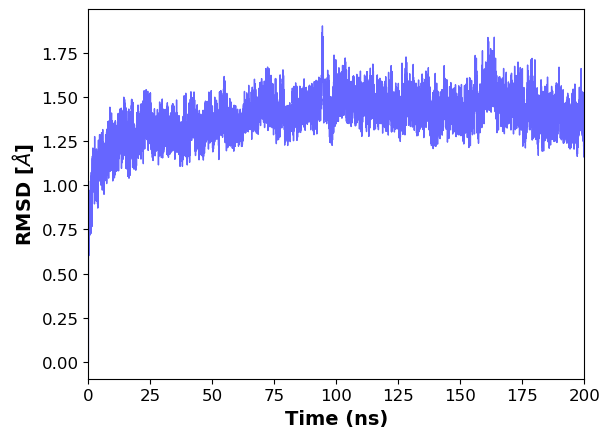

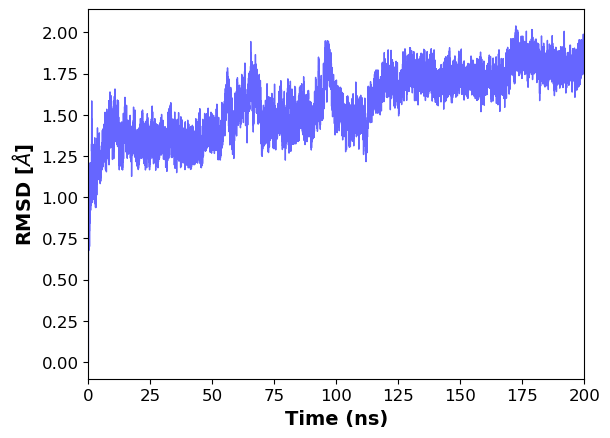

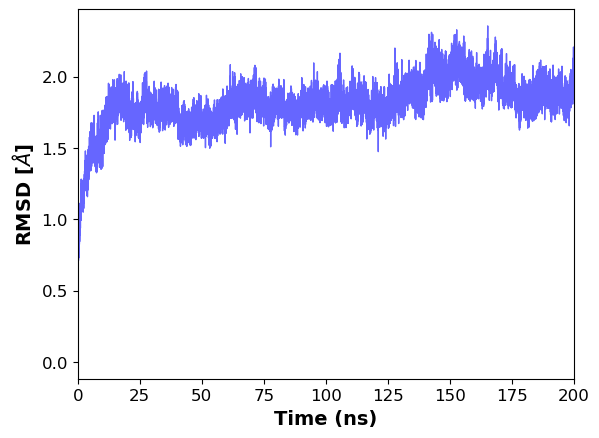

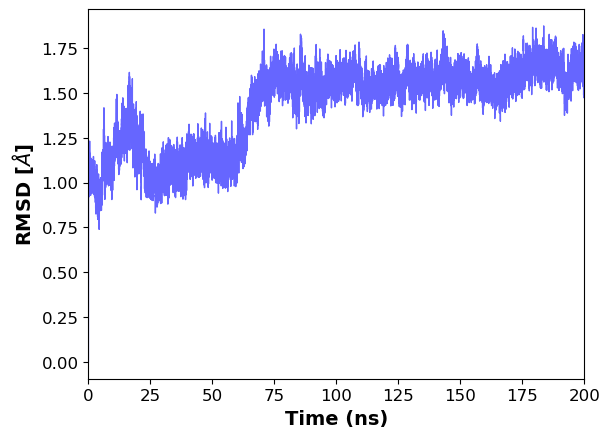

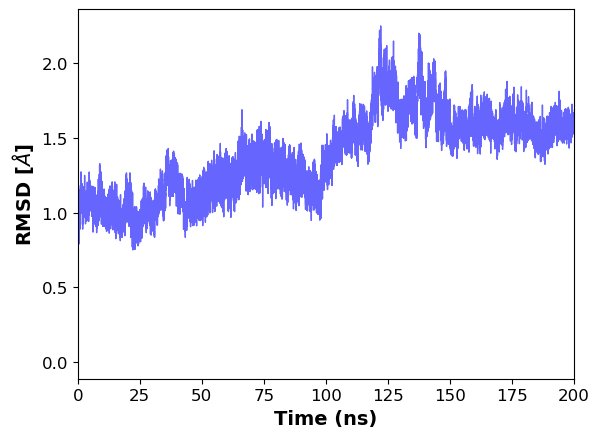

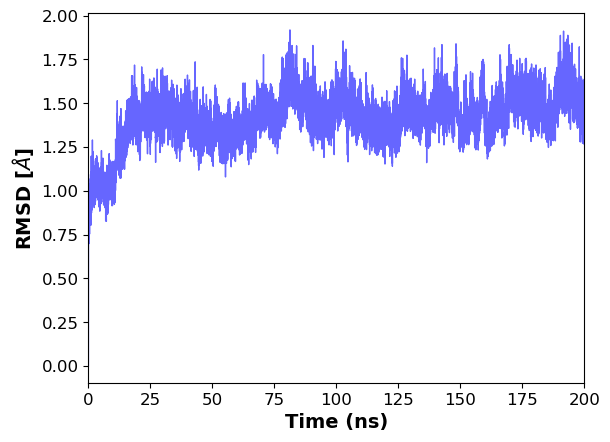

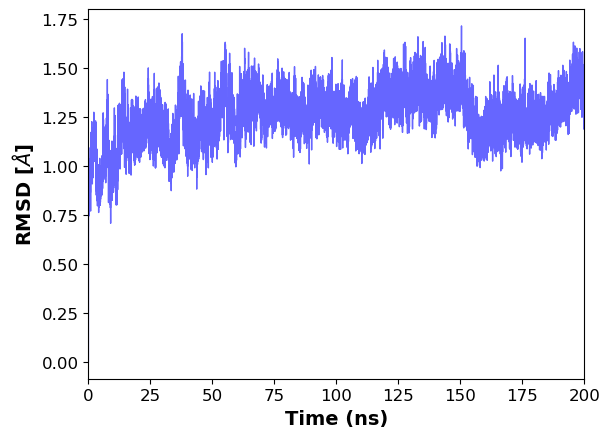

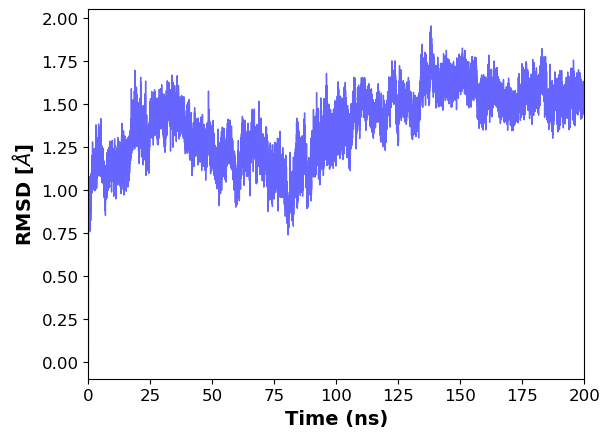

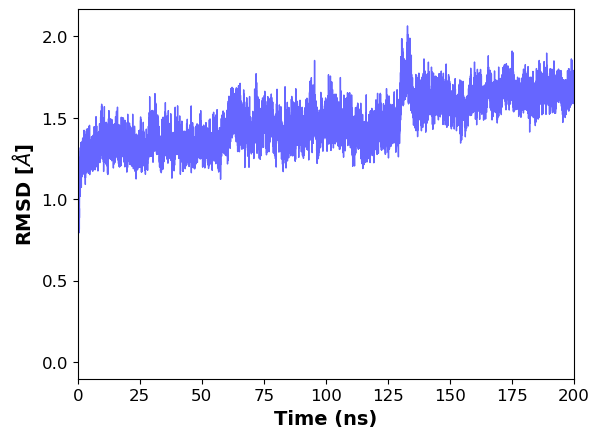

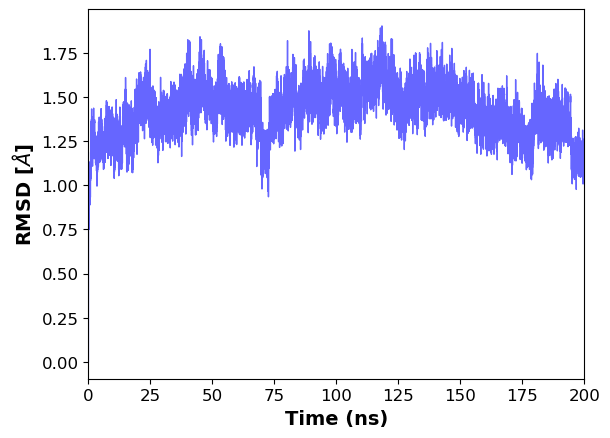

In [4]:
folders = ['2', '10', '13', '35', '56', '59', '152', '211', '223', '235', '236', '249',
           '266', '272', '290']
for i in folders:
    os.chdir(f'/home/nick/Documents/200ns/100ns.2/{i}')
    folder = i
    trajectory_file = 'md_0_1_noPBC.xtc'
    topology_file = 'md_0_1.tpr'
    pdb_file = 'EKB1m.pdb'
    # Load the trajectory
    u = mda.Universe(topology_file, trajectory_file)
    new = u.select_atoms("not (resname HOH)")
    with mda.Writer("first_frame.pdb", new.n_atoms) as W:
        W.write(new)
        frame_zero = 'first_frame.pdb'
    traj_load = pt.load(trajectory_file, top=frame_zero)
    rmsd = pt.rmsd(traj_load, ref = 0, mask = "@CA")
    Write_the_trajectory = 10
    stride_traj = 1
    simulation_ns = 200

    time = len(rmsd)*int(Write_the_trajectory)/1000
    time_array = np.arange(0,time,int(Write_the_trajectory)/1000)*int(stride_traj)

    # Plotting:
    ax = plt.plot(time_array, rmsd, alpha=0.6, color = 'blue', linewidth = 1.0)
    plt.xlim(0, simulation_ns)
    #plt.ylim(2, 6)

    plt.xlabel("Time (ns)", fontsize = 14, fontweight = 'bold')
    plt.ylabel("RMSD [$\AA$]", fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig(f'RMSD_{folder}.png', dpi=1000, bbox_inches='tight')
    plt.show()

    # radgyr = pt.radgyr(traj_load, mask = "@CA")
    # time = len(rmsd)*int(Write_the_trajectory)/1000
    # time_array = np.arange(0,time,int(Write_the_trajectory)/1000)*int(stride_traj)
    #
    # # Plotting:
    # plt.plot(time_array, radgyr, alpha=0.6, color = 'green', linewidth = 1.0)
    # plt.xlim(0, simulation_ns)
    # #plt.ylim(2, 6)
    #
    # plt.xlabel("Time (ns)", fontsize = 14, fontweight = 'bold')
    # plt.ylabel("Radius of gyration ($\AA$)", fontsize = 14, fontweight = 'bold')
    # plt.xticks(fontsize = 12)
    # plt.yticks(fontsize = 12)
    # plt.savefig(f'RoG_{folder}.png', dpi=1000, bbox_inches='tight')
    # plt.show()
    # rmsf = pt.rmsf(traj_load, "@CA")
    # bfactor = pt.bfactors(traj_load, byres=True)
    #
    # # Plotting:
    # plt.plot(rmsf[:,1], alpha=1.0, color = 'red', linewidth = 1.0)
    #
    # plt.xlabel("Residue", fontsize = 14, fontweight = 'bold')
    # plt.ylabel("RMSF ($\AA$)", fontsize = 14, fontweight = 'bold')
    # plt.xticks(fontsize = 12)
    # plt.xlim(0, len(rmsf[:-1]))
    #
    # #plt.xticks(np.arange(min(rmsf[:1]), max(rmsf[:1])))
    # plt.yticks(fontsize = 12)
    # plt.savefig(f'RMSF_{folder}.png', dpi=1000, bbox_inches='tight')
    # plt.show()
    #